In [14]:
import pandas as mypd
import matplotlib.pyplot as myplot
import seaborn as mysb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

mydata = mypd.read_csv("Wine.csv")
print(mydata)

'''
x = mydata.iloc[:,5:7]
print(x)

y = mydata.iloc[:,10:11]
print(y)

mymodel = LogisticRegression()
mymodel = mymodel.fit(x,y)
print(mymodel)
'''

mydata.isnull().sum()


       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [15]:
for col in mydata.columns:
    if mydata[col].isnull().sum() > 0:
        mydata[col] = mydata[col].fillna(mydata[col].mean())
    
mydata.isnull().sum().sum()

0

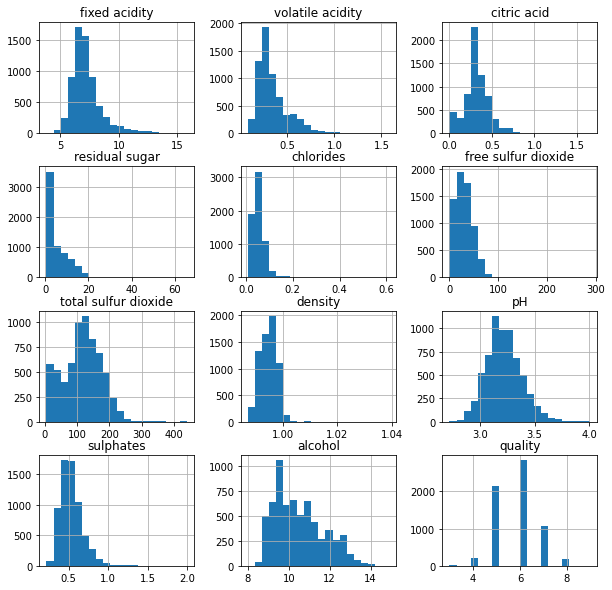

In [16]:
mydata.hist(bins=20, figsize=(10,10))
myplot.show()

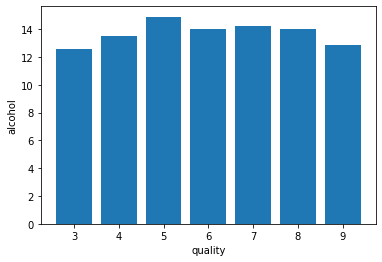

In [12]:
myplot.bar(mydata['quality'],mydata['alcohol'])
myplot.xlabel('quality')
myplot.ylabel('alcohol')
myplot.show()

/tmp/ipykernel_6719/2323602412.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mysb.heatmap(mydata.corr(), annot=True)


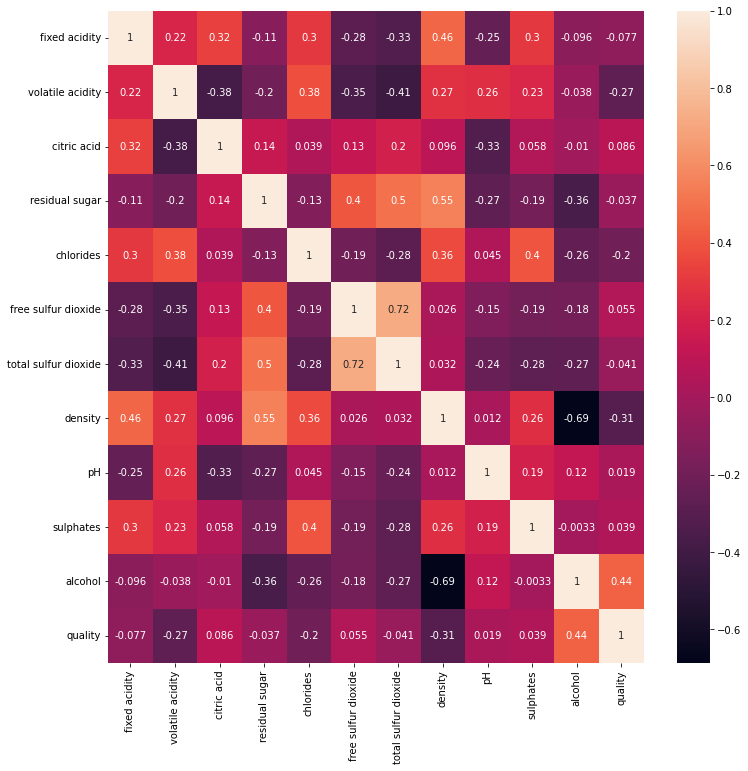

In [17]:
myplot.figure(figsize=(12, 12))
mysb.heatmap(mydata.corr(), annot=True)
myplot.show()

In [18]:
mydata.replace({'white':1,'red':0},inplace=True)

mydata['best quality'] = mydata.quality.apply(lambda x:1 if x > 5 else 0)
mydata['best quality'].value_counts()

1    4113
0    2384
Name: best quality, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
features = mydata.drop(['quality','best quality'],axis=1)
target = mydata['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(
    features, target, test_size=0.2, random_state=40, shuffle=True)

xtrain.shape,xtrain.shape

((5197, 12), (5197, 12))

In [20]:
model = LogisticRegression()
model.fit(xtrain,ytrain)


/home/nasc/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
ypred = model.predict(xtest)

from sklearn.metrics import accuracy_score
model_acc = accuracy_score(ypred,ytest)

print(round(model_acc*100,2))

mymatrix = confusion_matrix(ypred,ytest)
print(mymatrix)

72.54
[[242 125]
 [232 701]]


In [26]:
print(metrics.classification_report(ytest,model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.66      0.51      0.58       474
           1       0.75      0.85      0.80       826

    accuracy                           0.73      1300
   macro avg       0.71      0.68      0.69      1300
weighted avg       0.72      0.73      0.72      1300

